In [1]:
import nxsdk.api.n2a as nx
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
from primitives import *
import agent

In [2]:
grid_x = 5
grid_y = 5
dimensions = 2

n_states = grid_x * grid_y
n_actions = 4
n_estimates = n_states * n_actions

In [3]:
n_estimates

100

In [4]:
t_epoch = 50
cycles = 200
runout = 100

In [5]:
agent = agent.GridAgent(n_actions, n_states, n_epochs=1000)

In [6]:
agent.hippocampus.blocks

{'feedback_sum': <primitives.OrNode at 0x7f6dbbfcabe0>,
 'filter': <primitives.AndNode at 0x7f6dbc0617f0>,
 'punishment_buffer': <primitives.OrNode at 0x7f6dbbfca1d0>,
 'punishment_gate': <primitives.AndNode at 0x7f6dbc012ac8>,
 'reward_buffer': <primitives.OrNode at 0x7f6dbbfca860>,
 'reward_gate': <primitives.AndNode at 0x7f6dbbfca320>,
 'state_memory': <primitives.FlipFlopNode at 0x7f6dbc053320>}

In [7]:
#dec_spks = agent.decoder.get_outputs().probe(nx.ProbeParameter.SPIKE)

In [8]:
#enc_spks = agent.encoder.get_outputs().probe(nx.ProbeParameter.SPIKE)

In [9]:
#hc_spks = agent.hippocampus.blocks['state_memory'].get_outputs().probe(nx.ProbeParameter.SPIKE)

In [10]:
ctx_spks = agent.cortex.get_outputs().probe(nx.ProbeParameter.SPIKE)

In [11]:
net = agent.network

In [12]:
results = []

In [13]:
runs = 1

In [14]:
for i in range(runs):
    results.append(agent.run(1000))

INFO:DRV:  SLURM is being run in background
INFO:DRV:  Connecting to 10.212.98.108:37331
INFO:DRV:      Host server up..............Done 0.21s
INFO:DRV:      Encoding axons/synapses.....Done 0.23s
INFO:DRV:      Compiling Embedded snips....Done 0.31s
INFO:HST:  Args chip=0 cpu=0 /homes/wolin/python3_venv/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1588027638.9385946/launcher_chip0_lmt0.bin --chips=1 --remote-relay=1 --epoch=0 
INFO:DRV:      Booting up..................Done 2.64s
INFO:DRV:      Encoding probes.............Done 1.11ms
INFO:HST:  Lakemont_driver...
INFO:DRV:      Configuring registers.......Done 0.11s
INFO:DRV:      Transferring probes.........Done 4.90ms
INFO:DRV:      Transferring spikes.........Done 1.38ms
INFO:HST:  chip=0 cpu=0 Setting up...
INFO:HST:  chip=0 cpu=0 Got variables
INFO:HST:  chip=0 cpu=0 Got R/P/State/Condition compartments
INFO:HST:  chip=0 cpu=0 Got Counter compartments, done.
INFO:DRV:      Executing...................Done 37.0

In [15]:
agent.board.disconnect()

INFO:HST:  chip=0 cpu=0 halted, status=0x0


In [16]:
results[-1]

(array([[0, 0, 1],
        [2, 0, 0],
        [0, 0, 1],
        ...,
        [1, 3, 1],
        [0, 3, 2],
        [3, 0, 0]]),
 array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
         0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
         0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
         0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  0,

In [17]:
results[-1][0].shape

(1000, 3)

(array([321.,   0.,   0., 472.,   0.,   0.,  37.,   0.,   0., 170.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

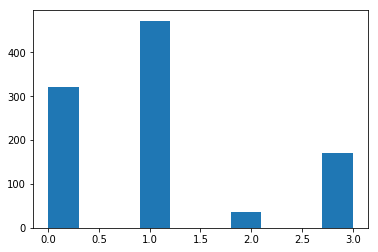

In [18]:
plt.hist(results[-1][0][:,0])

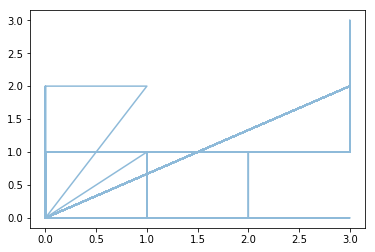

In [19]:
plt.plot(results[-1][0][:,1], results[-1][0][:,2], alpha=0.50)

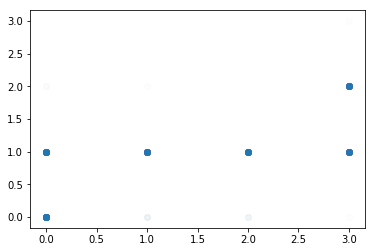

In [20]:
plt.scatter(results[-1][0][:,1], results[-1][0][:,2], alpha=0.01)

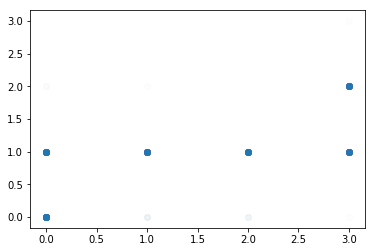

In [21]:
plt.scatter(results[-1][0][:,1], results[-1][0][:,2], alpha=0.01)

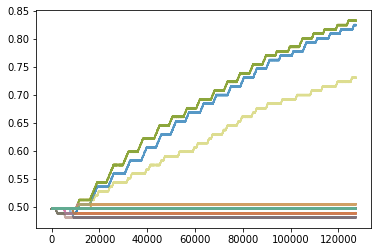

In [26]:
avglen = agent.l_epoch * 5

for i in range(100):
    plt.plot(np.convolve(ctx_spks[0].data[i,:],np.ones(avglen), mode='valid')/avglen, alpha=0.5)